# Arboles AVL

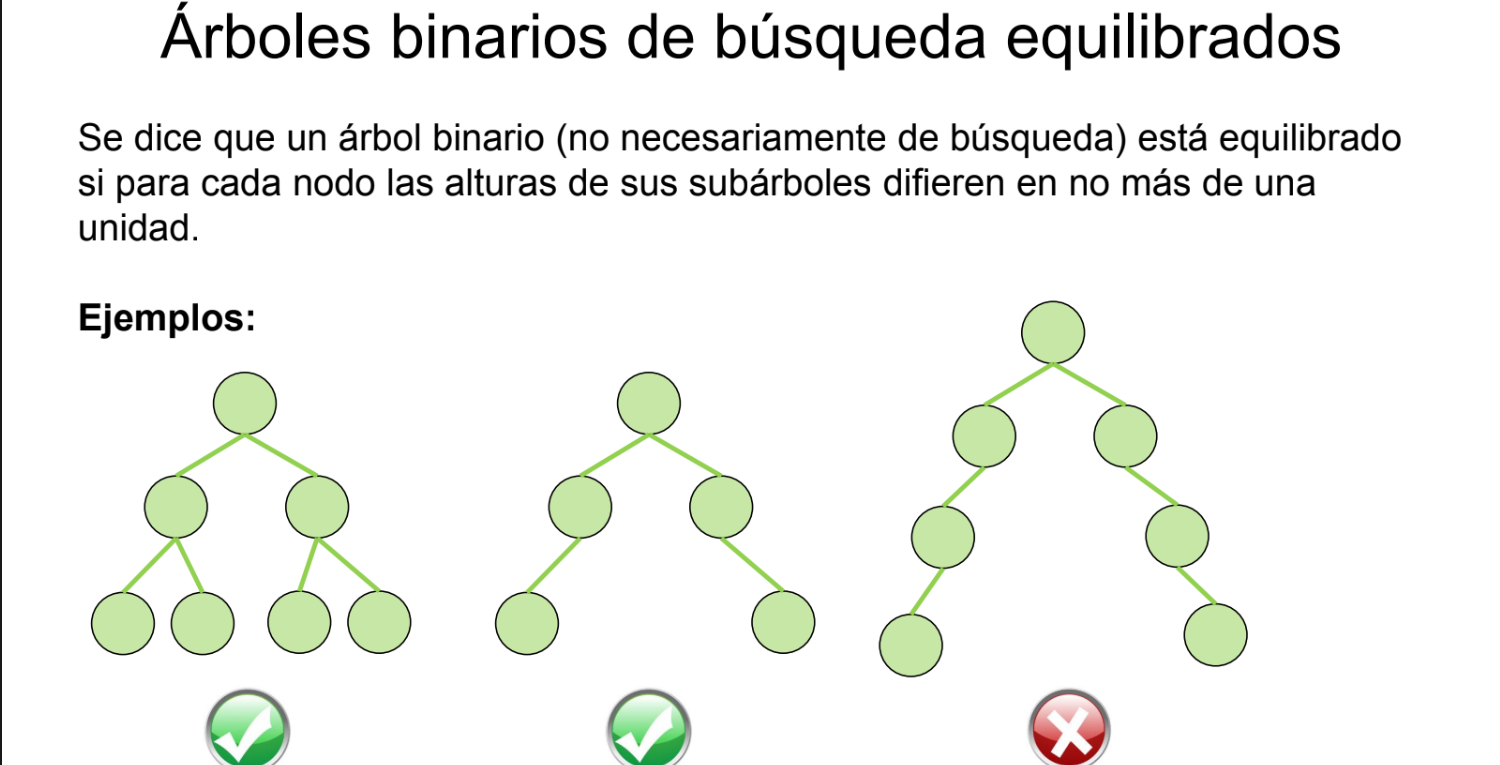

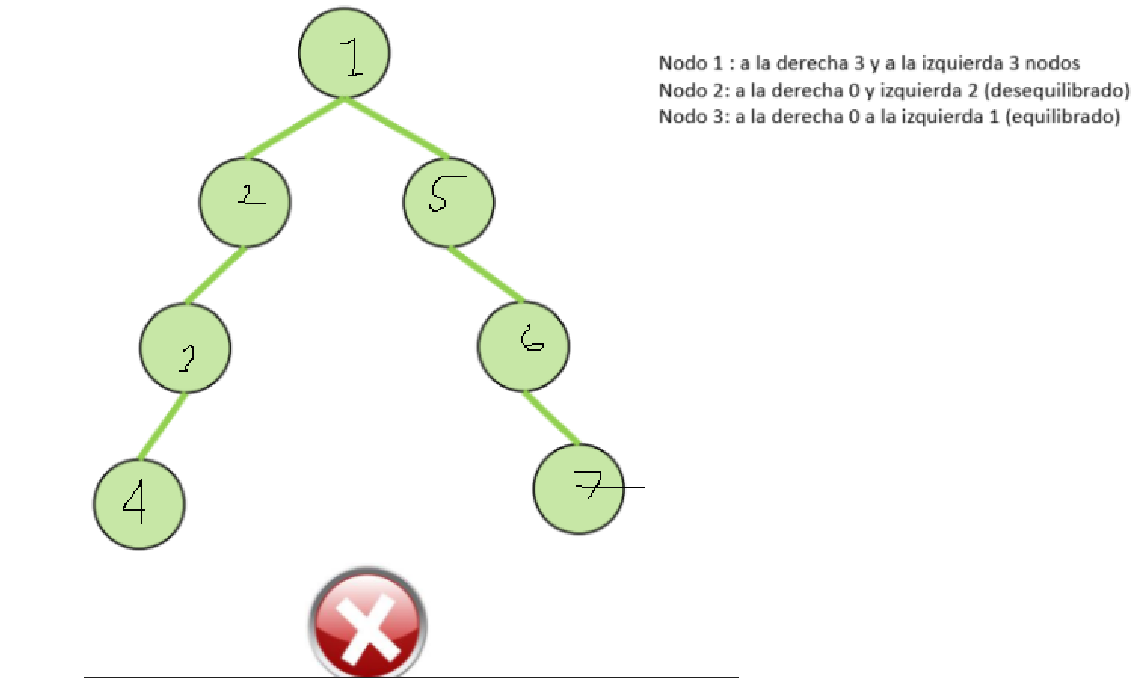

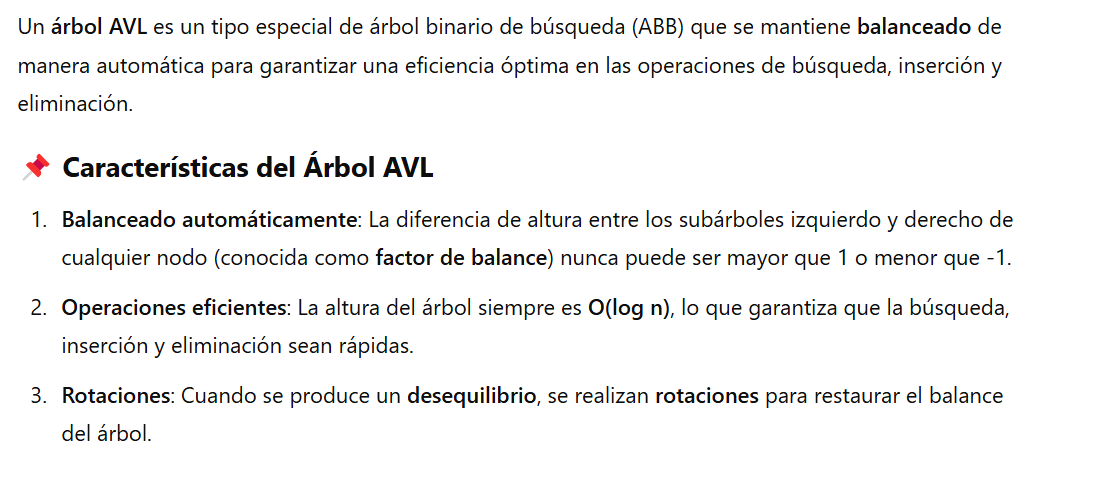

En un AVL cada nodo debe contener un atributo adicional donde almacenar su
altura: las hojas tienen una altura de 1 y para el resto de nodos corresponde a 1
más la mayor altura de sus dos subárboles.
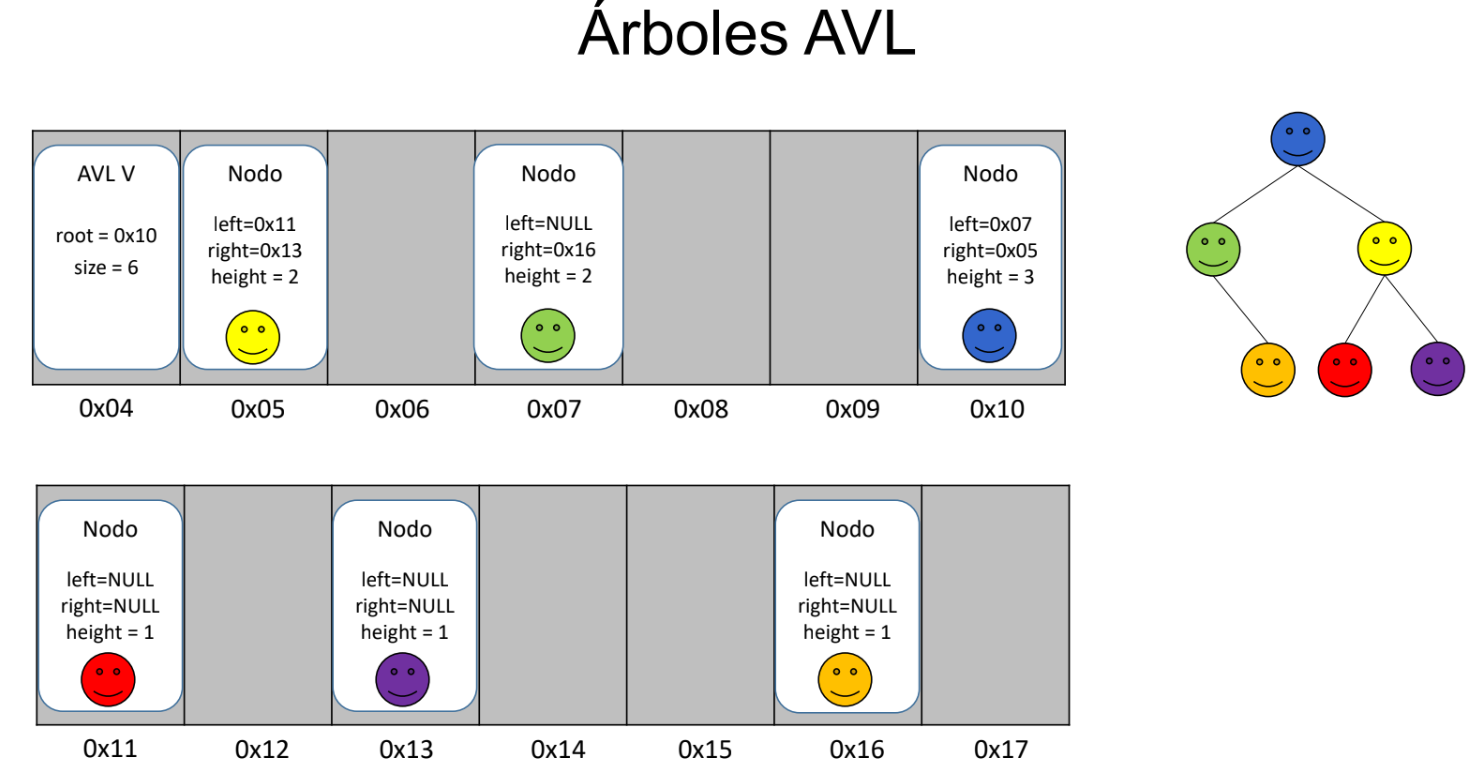

## Factor de equilibrio
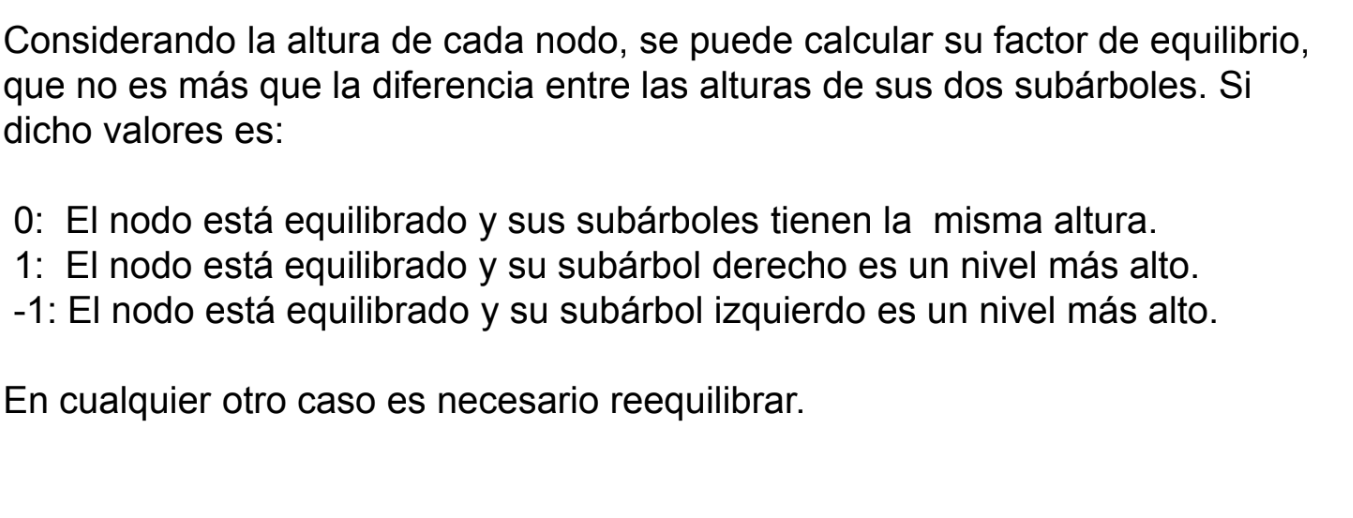
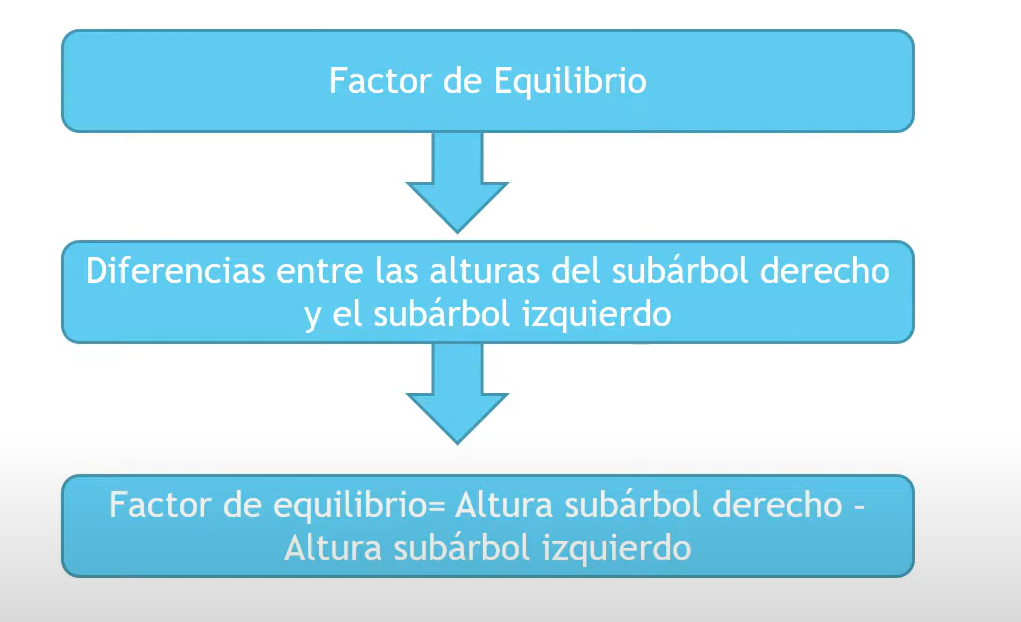
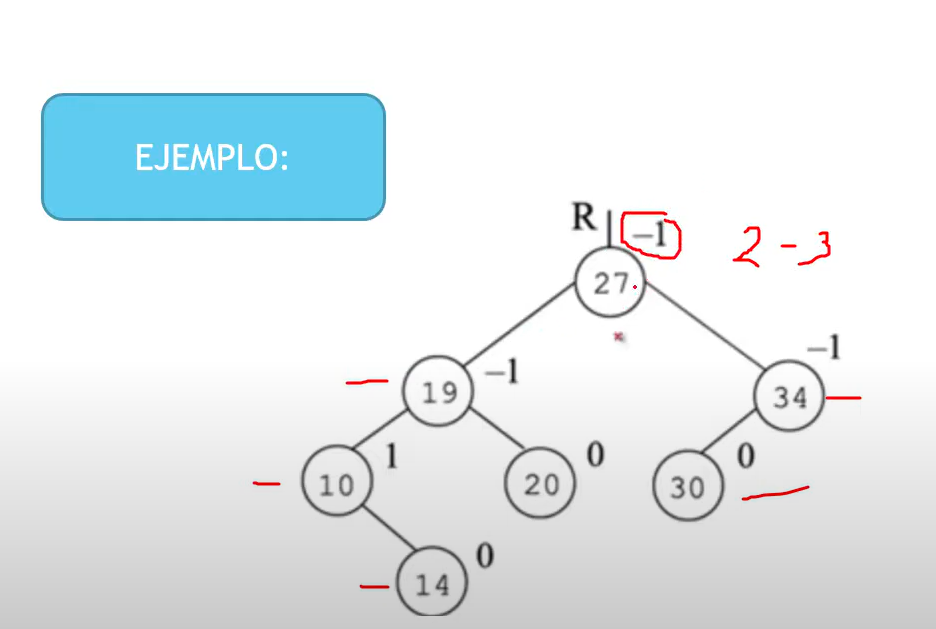
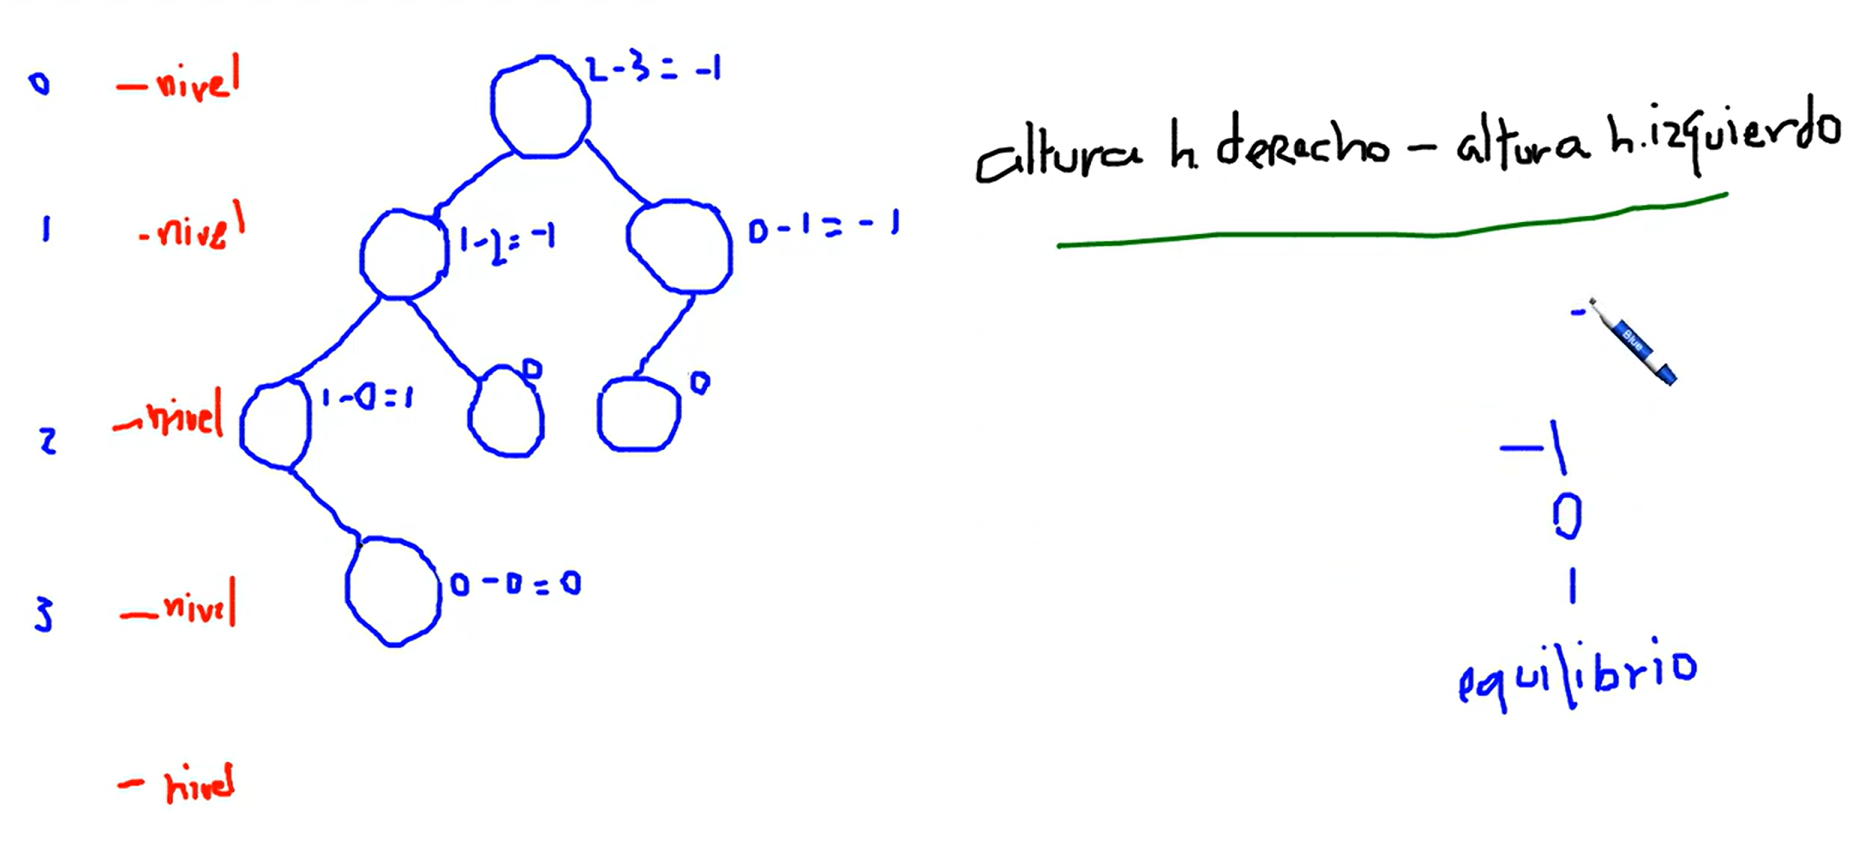

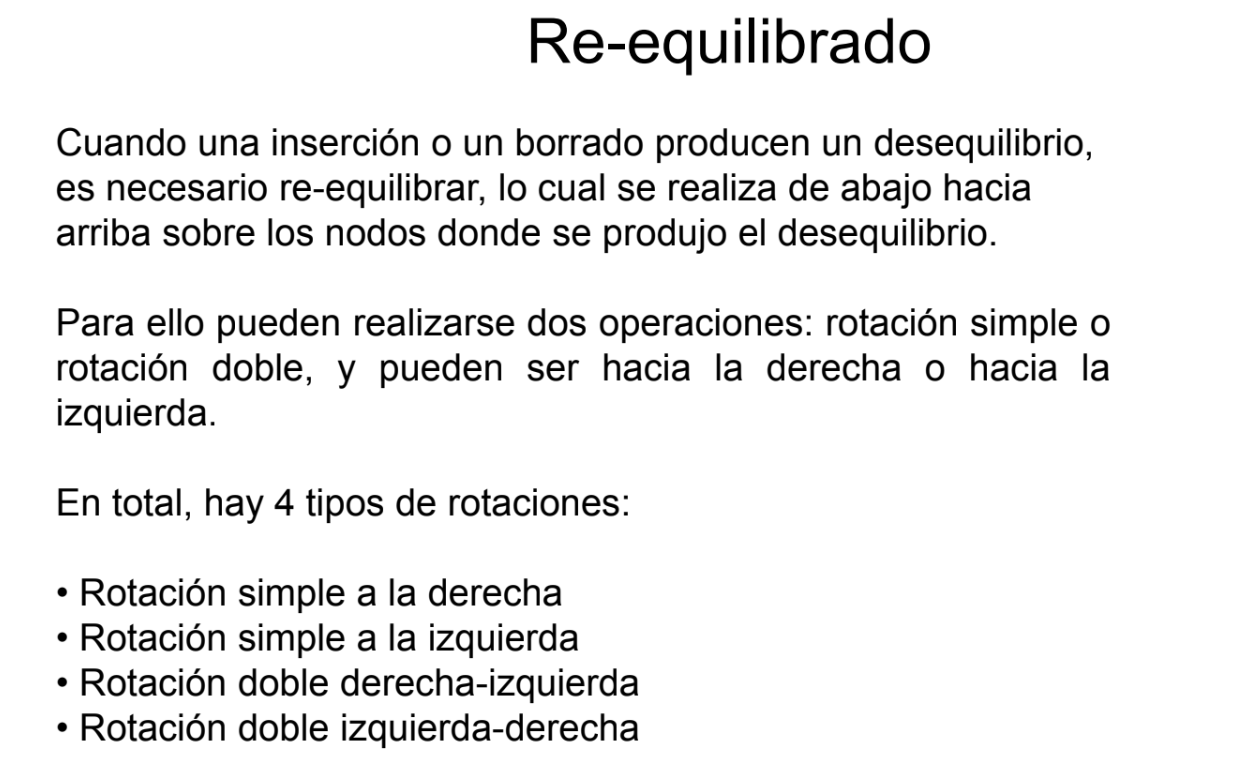

# Rotaciones simples

# Rotación simple a la derecha
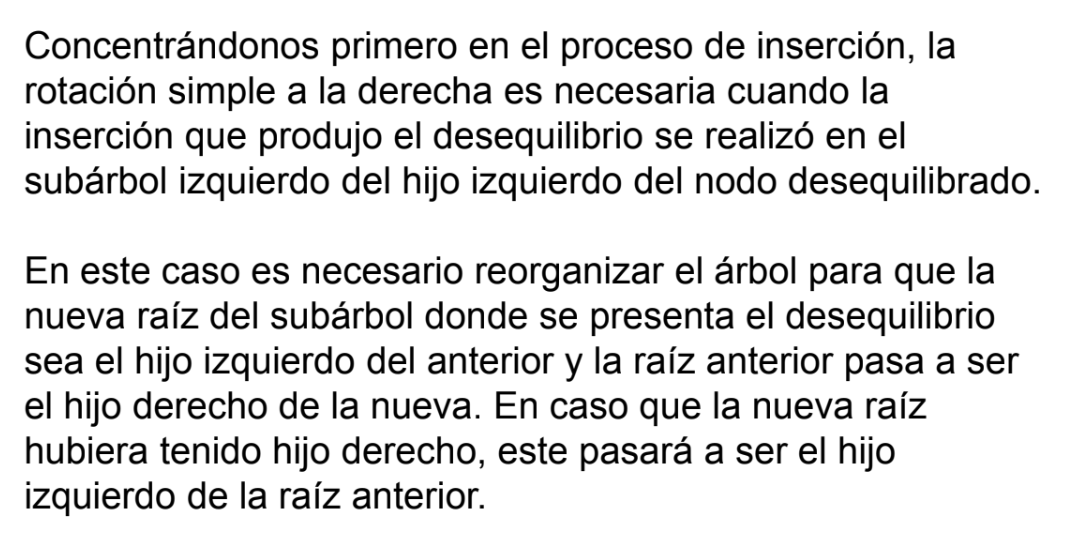


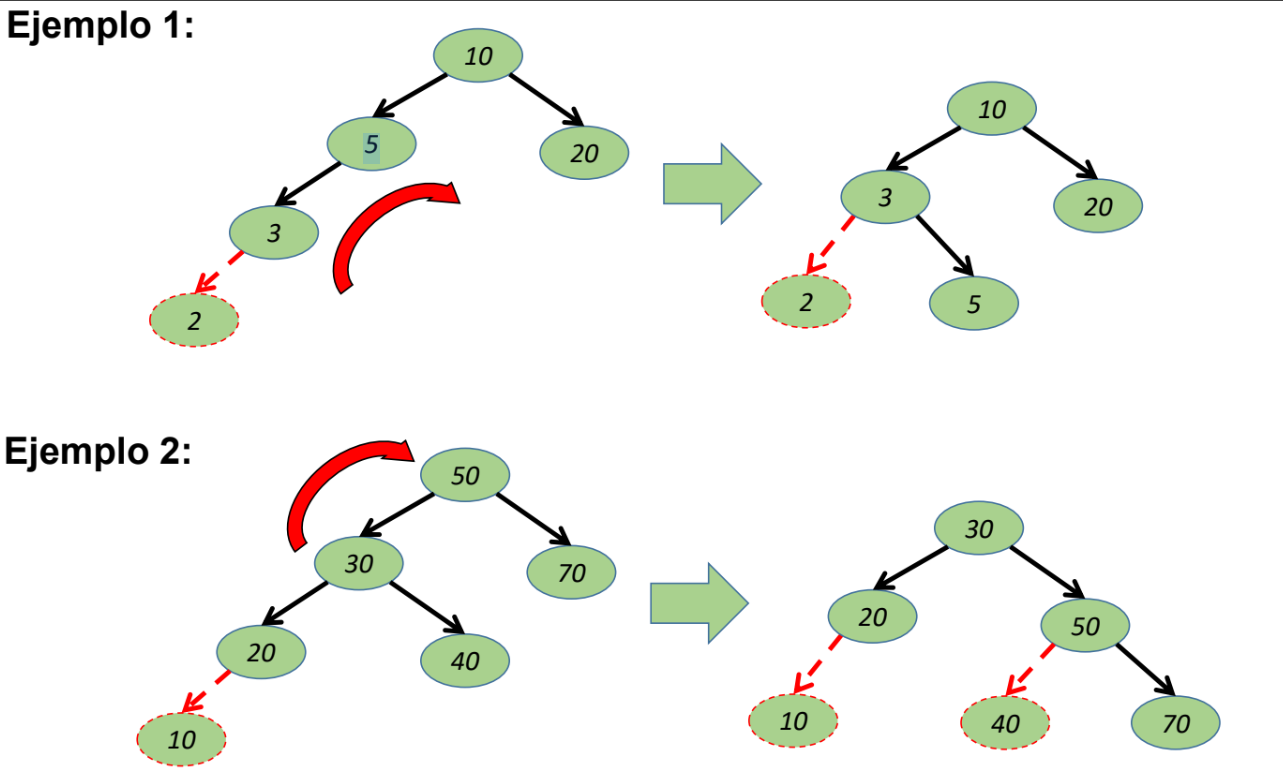

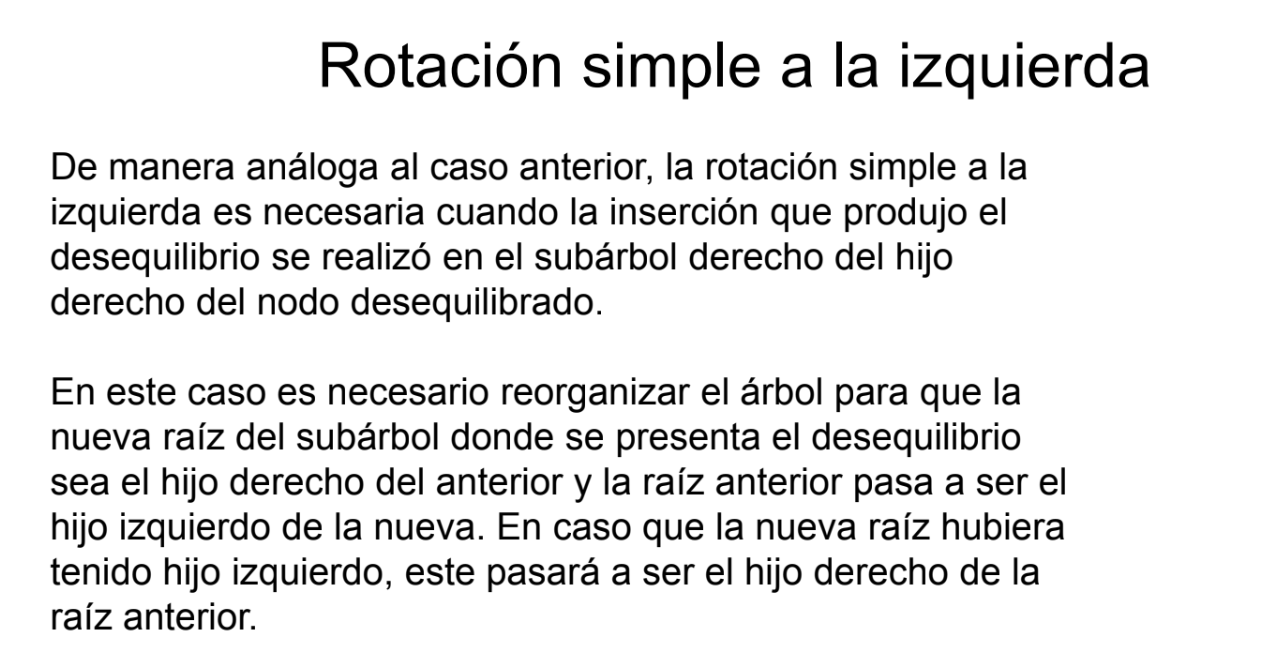
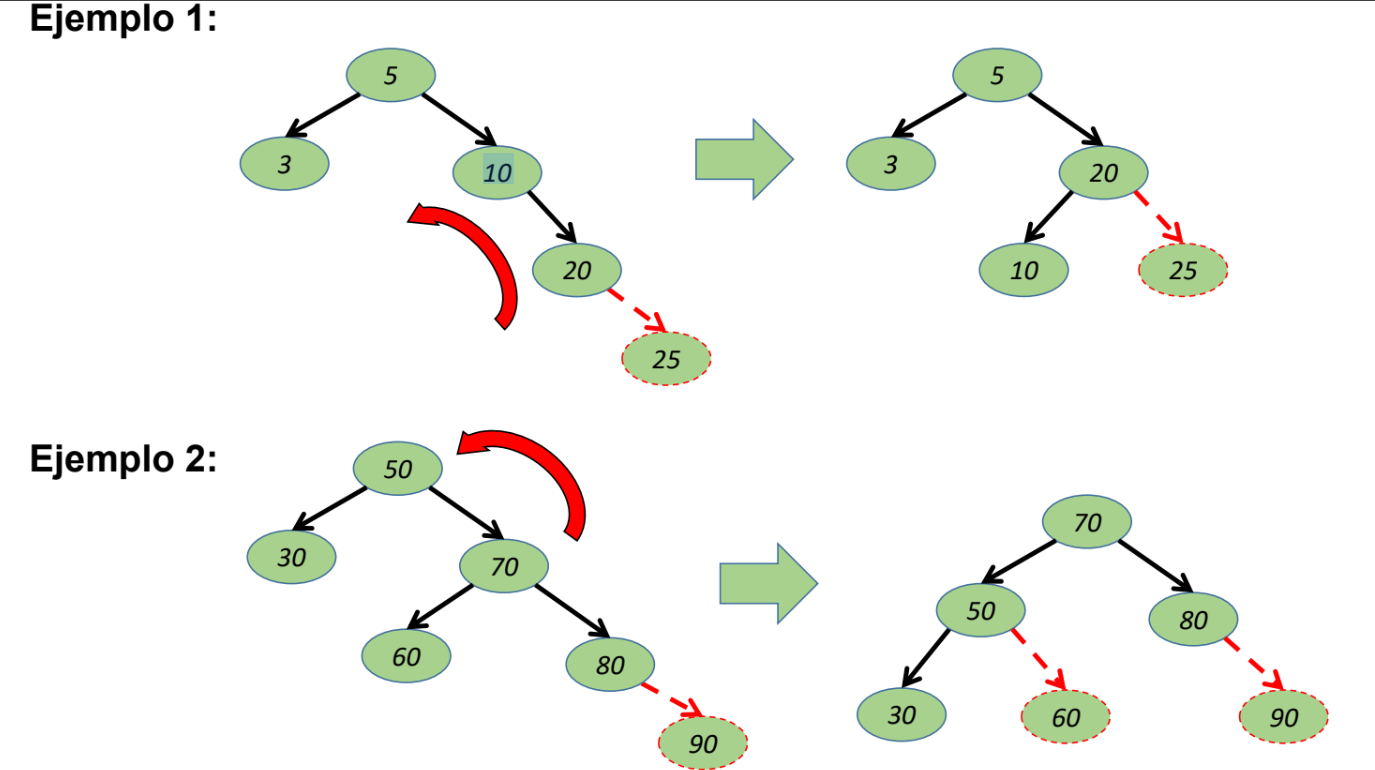

# Rotaciones dobles

## Rotación doble izquierda-derecha

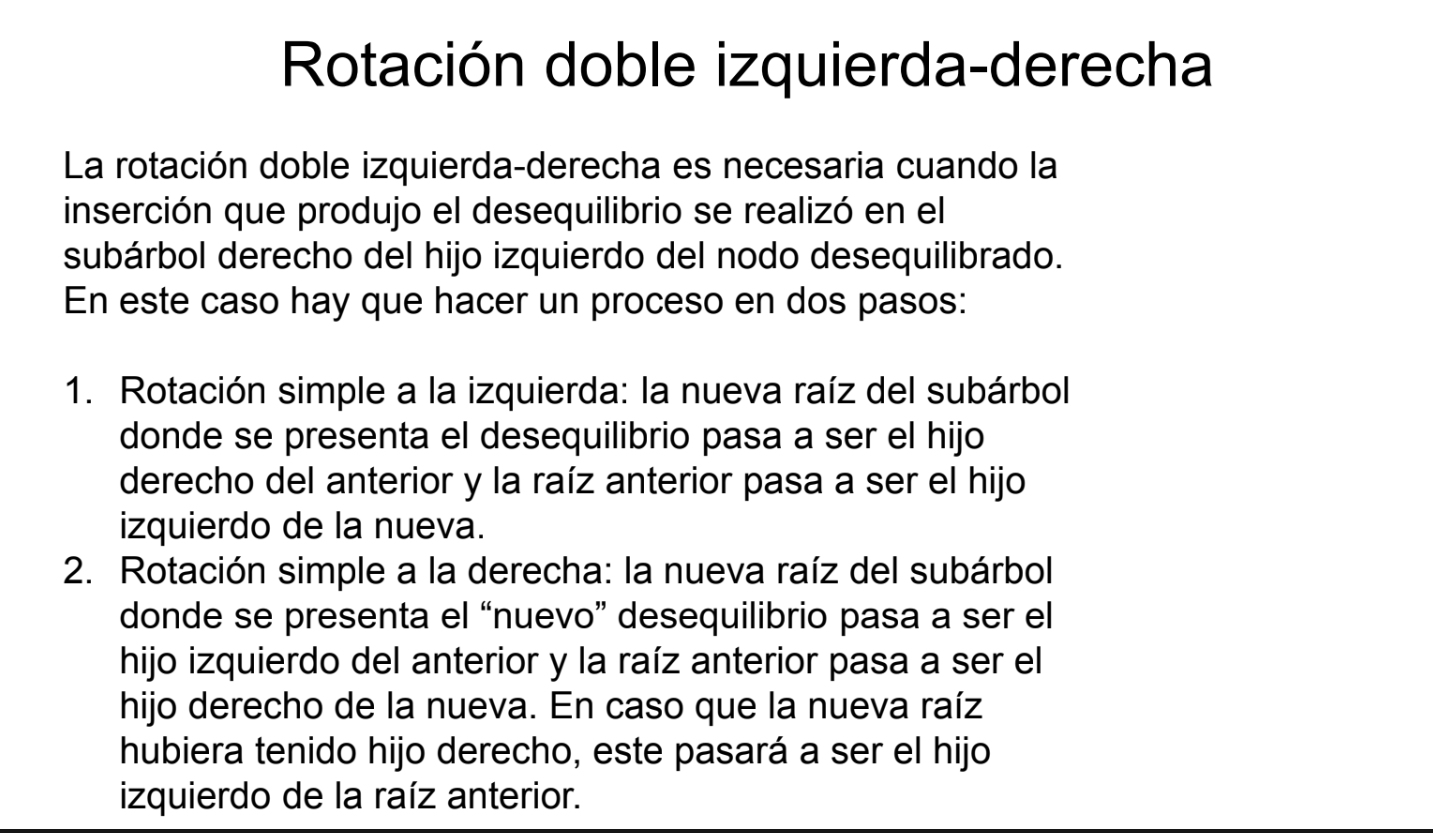
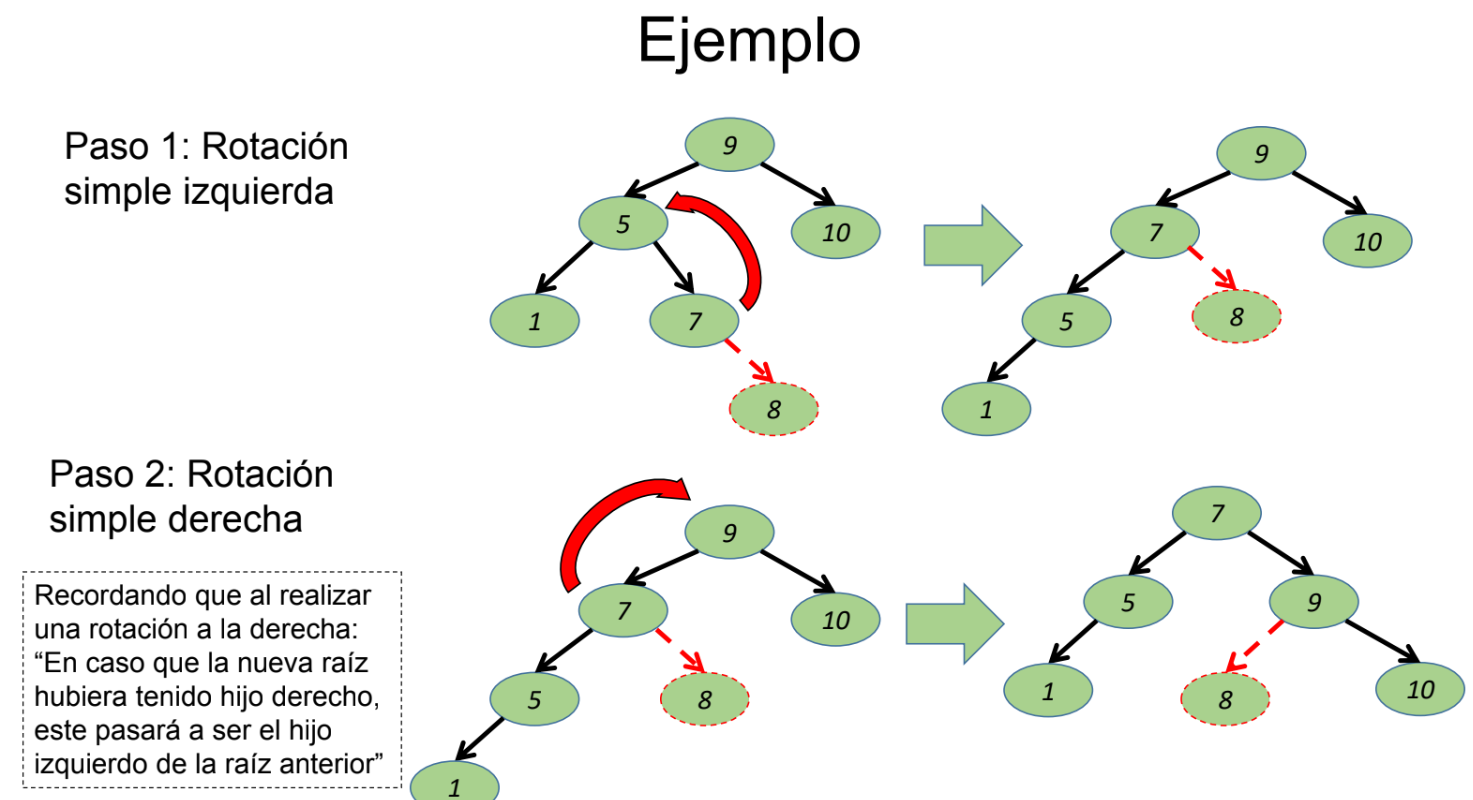
podemos ver los factores de equilibrio
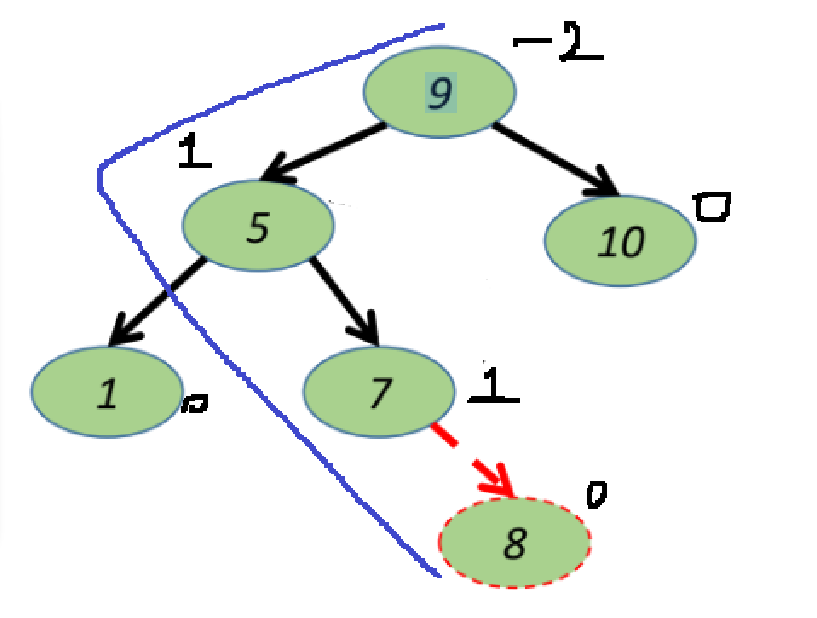

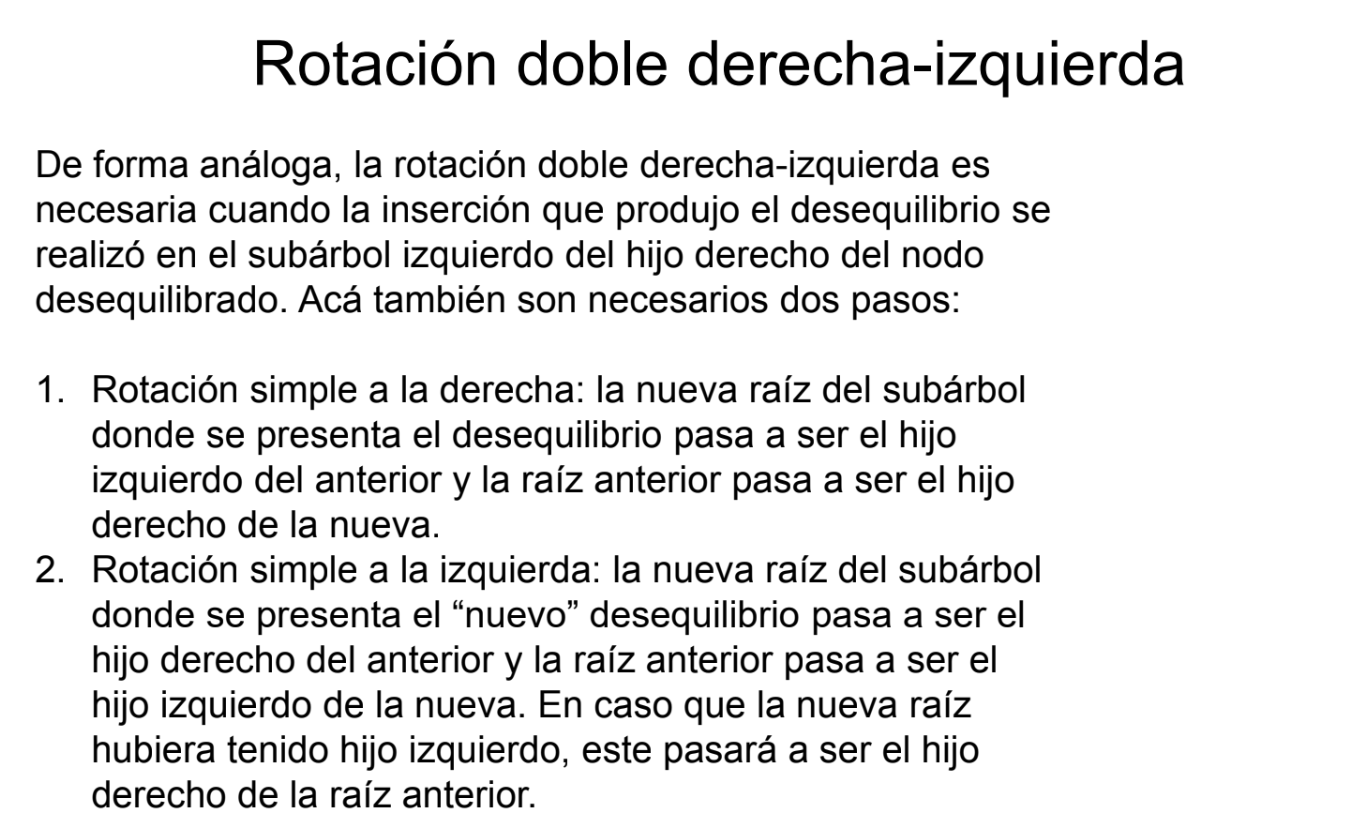
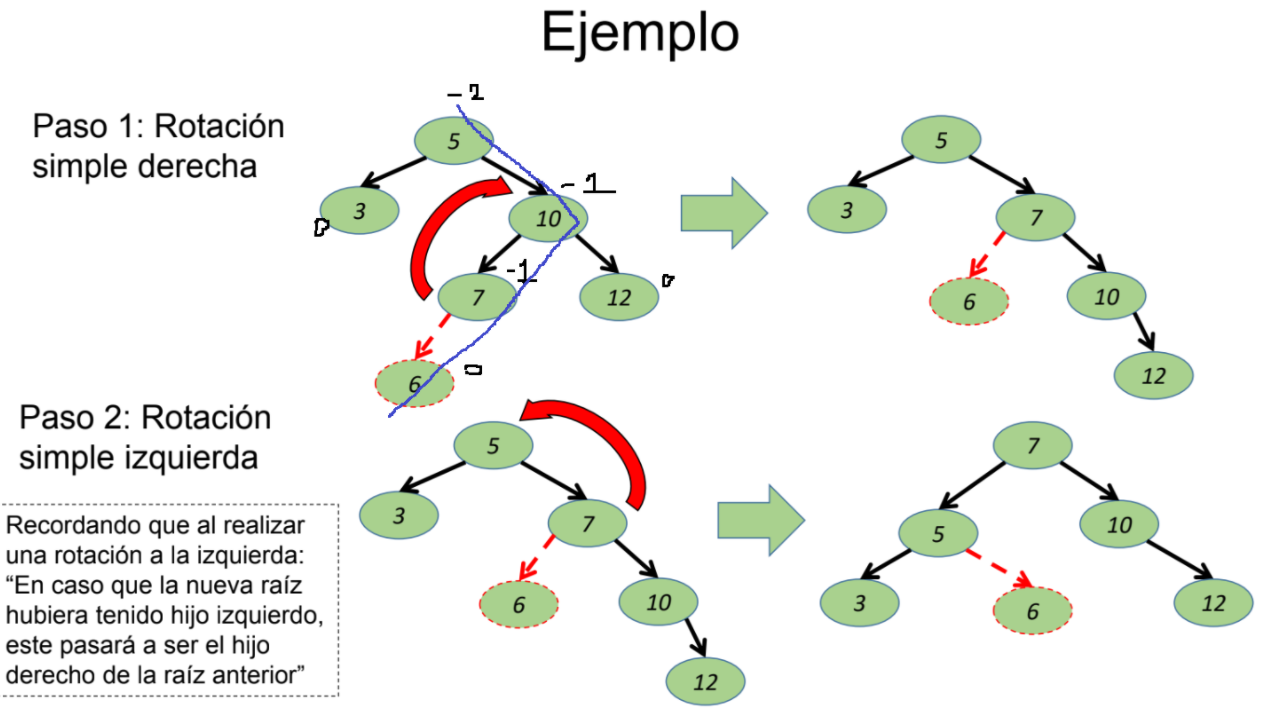
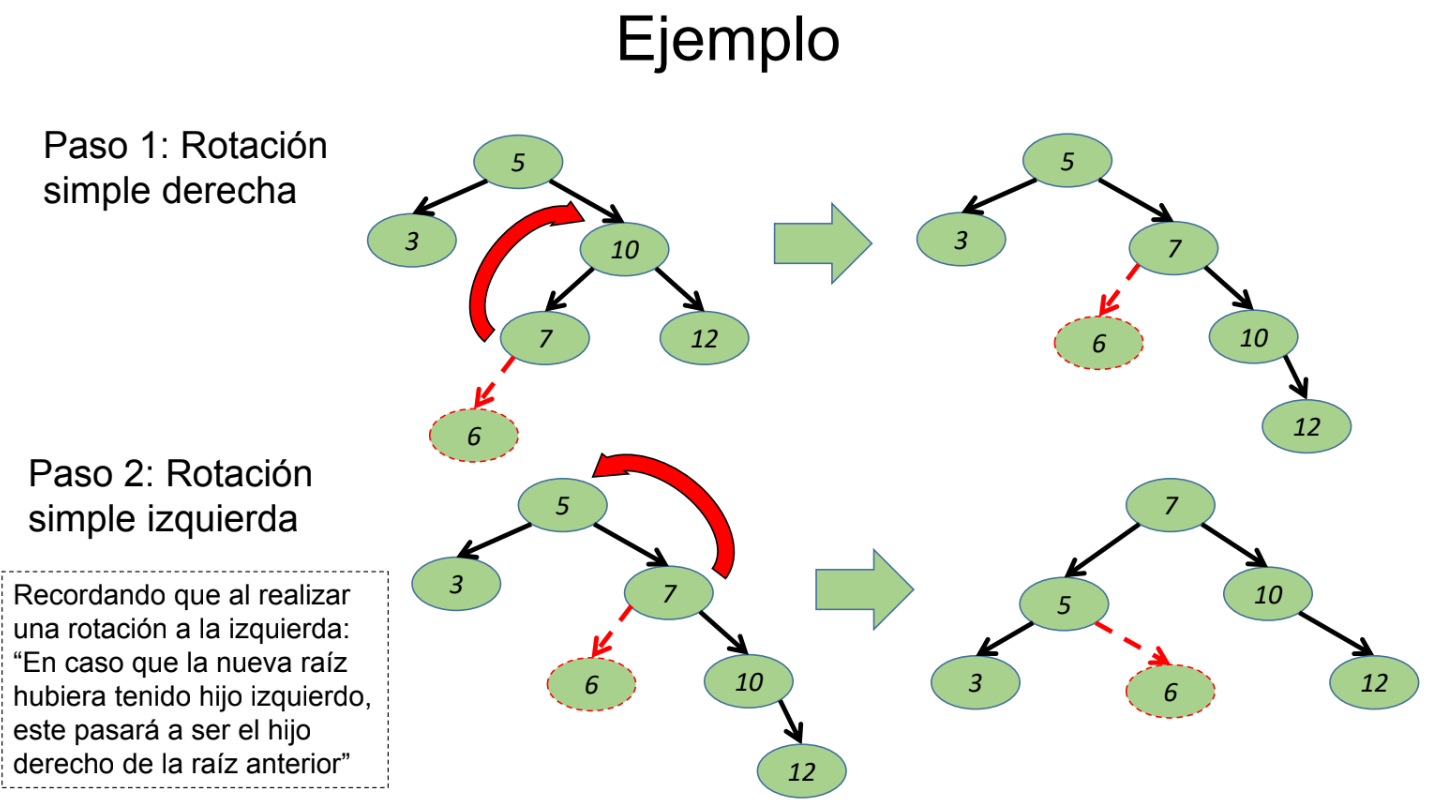

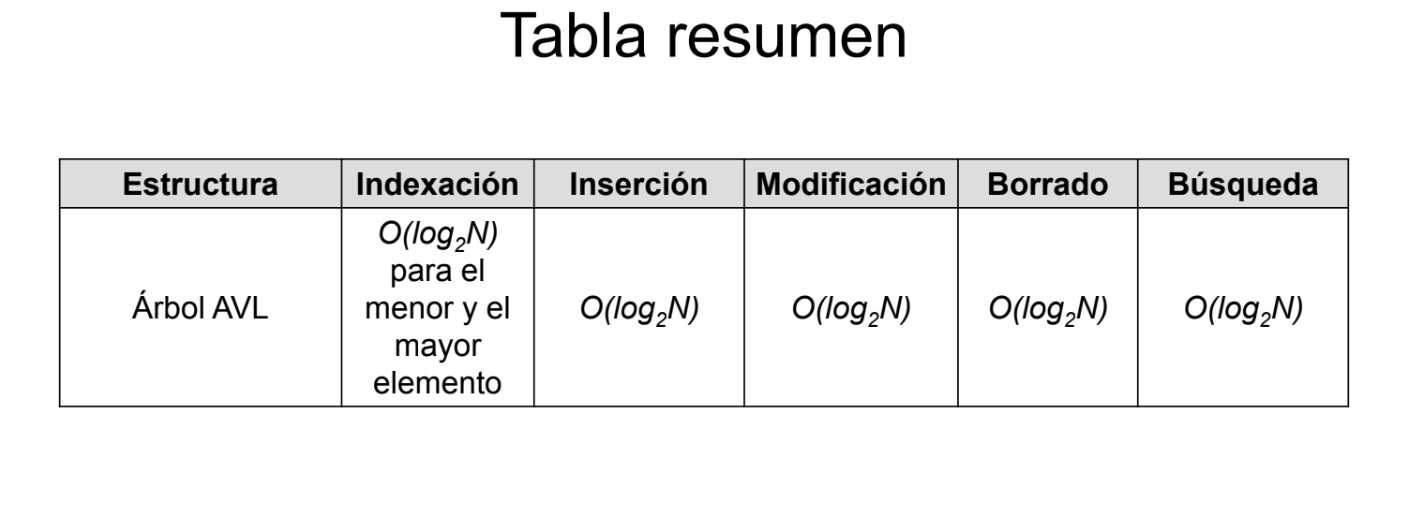

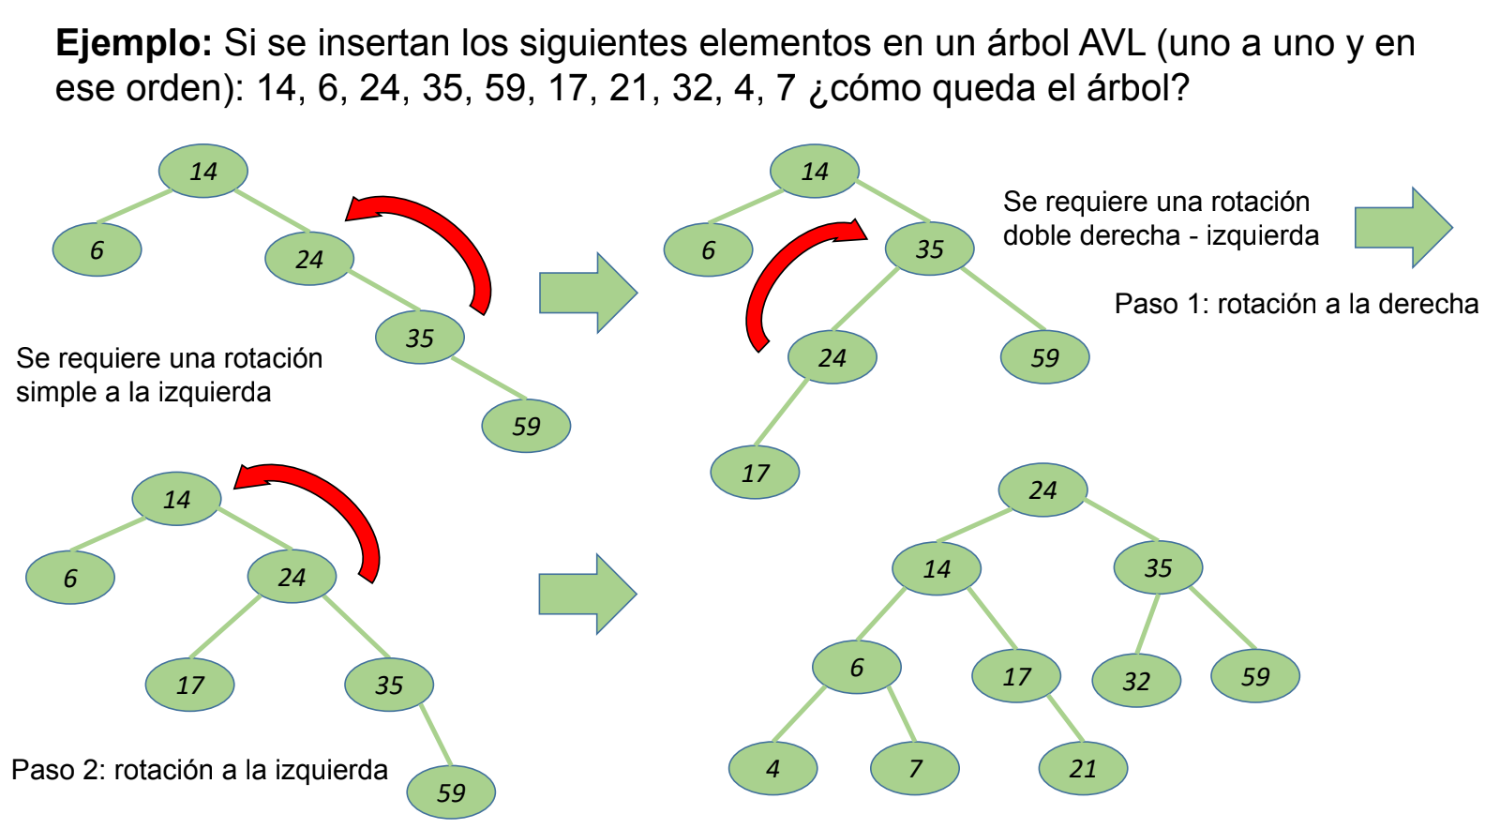

### Ejercicio 1

In [1]:

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None
        
    def height(self, node):
        if not node:
            return 0
        return node.height
    
    def balance_factor(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        y.height = max(self.height(y.left), self.height(y.right)) + 1
        x.height = max(self.height(x.left), self.height(x.right)) + 1
        return x
    
    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        x.height = max(self.height(x.left), self.height(x.right)) + 1
        y.height = max(self.height(y.left), self.height(y.right)) + 1
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
        
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        else:
            return root
        
        root.height = max(self.height(root.left), self.height(root.right)) + 1
        
        balance = self.balance_factor(root)
        
        # Left Left
        if balance > 1 and key < root.left.key:
            return self.right_rotate(root)
        
        # Right Right
        if balance < -1 and key > root.right.key:
            return self.left_rotate(root)
        
        # Left Right
        if balance > 1 and key > root.left.key:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        
        # Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
        
        return root
    
    def postorder(self, root, result):
        if root:
            self.postorder(root.left, result)
            self.postorder(root.right, result)
            result.append(root.key)

def solve_case(values):
    avl = AVLTree()
    root = None
    for value in values:
        if value == '#':
            break
        root = avl.insert(root, value)
    
    result = []
    avl.postorder(root, result)
    return ''.join(result)

def main():
    C = int(input())
    for _ in range(C):
        values = input().split()
        print(solve_case(values))


main()

ACB
A1B2D4C3
1X3X2X6X8X7X5X


### Ejercicio 2

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def get_height(self, node):
        if not node:
            return 0
        return node.height
    
    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)
    
    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        x.height = max(self.get_height(x.left), self.get_height(x.right)) + 1
        return x
    
    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        x.height = max(self.get_height(x.left), self.get_height(x.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
        
        if key < root.value:
            root.left = self.insert(root.left, key)
        elif key > root.value:
            root.right = self.insert(root.right, key)
        else:
            return root
        
        root.height = max(self.get_height(root.left), self.get_height(root.right)) + 1
        balance = self.get_balance(root)
        
        # Left Left
        if balance > 1 and key < root.left.value:
            return self.right_rotate(root)
        # Right Right
        if balance < -1 and key > root.right.value:
            return self.left_rotate(root)
        # Left Right
        if balance > 1 and key > root.left.value:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        # Right Left
        if balance < -1 and key < root.right.value:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
        
        return root
    
    def count_max_level_leaves(self, root):
        if not root:
            return 0, 0
        
        if not root.left and not root.right:
            return 1, 1
            
        left_count, left_height = self.count_max_level_leaves(root.left)
        right_count, right_height = self.count_max_level_leaves(root.right)
        
        if left_height > right_height:
            return left_count, left_height + 1
        elif right_height > left_height:
            return right_count, right_height + 1
        else:
            return left_count + right_count, left_height + 1

def solve():
    C = int(input())
    for _ in range(C):
        values = list(map(int, input().split()))
        avl = AVLTree()
        root = None
        
        for val in values:
            if val == -1:
                break
            root = avl.insert(root, val)
        
        count, _ = avl.count_max_level_leaves(root)
        print(count)


solve()

2
1
4


## ejercicio 3


In [2]:

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None
    
    def height(self, node):
        if not node:
            return 0
        return node.height
    
    def balance_factor(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def update_height(self, node):
        if not node:
            return
        node.height = max(self.height(node.left), self.height(node.right)) + 1
    
    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    
    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
            
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        else:
            return root
            
        self.update_height(root)
        balance = self.balance_factor(root)
        
        # Left Left
        if balance > 1 and key < root.left.key:
            return self.right_rotate(root)
        
        # Right Right
        if balance < -1 and key > root.right.key:
            return self.left_rotate(root)
        
        # Left Right
        if balance > 1 and key > root.left.key:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        
        # Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
            
        return root

    def get_child_count(self, node):
        if not node:
            return 0
        if node.left and node.right:
            return 2
        if node.left:
            return -1
        if node.right:
            return 1
        return 0

    def get_concentric_rings(self):
        if not self.root:
            return ""
        
        result = []
        queue = [self.root]
        
        while queue:
            level_size = len(queue)
            for _ in range(level_size):
                node = queue[0]
                queue.pop(0)
                result.append(str(self.get_child_count(node)))
                
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
                    
        return ".".join(result)

def main():
    while True:
        n = int(input())
        if n == 0:
            break
            
        values = list(map(int, input().split()))
        avl = AVLTree()
        root = None
        
        for value in values:
            root = avl.insert(root, value)
        
        avl.root = root
        print(avl.get_concentric_rings())


main()

2.0.0
2.-1.1.0.0
2.2.2.0.0.0.0


## Ejercicio 4

In [3]:

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None
        
    def height(self, node):
        if not node:
            return 0
        return node.height
    
    def balance_factor(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def update_height(self, node):
        if node:
            node.height = max(self.height(node.left), self.height(node.right)) + 1
    
    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x
    
    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y
    
    def insert(self, key):
        self.root = self._insert(self.root, key)
        
    def _insert(self, root, key):
        if not root:
            return Node(key)
            
        if key < root.key:
            root.left = self._insert(root.left, key)
        elif key > root.key:
            root.right = self._insert(root.right, key)
        else:
            return root
            
        self.update_height(root)
        balance = self.balance_factor(root)
        
        # Left Left
        if balance > 1 and key < root.left.key:
            return self.right_rotate(root)
            
        # Right Right
        if balance < -1 and key > root.right.key:
            return self.left_rotate(root)
            
        # Left Right
        if balance > 1 and key > root.left.key:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
            
        # Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
            
        return root

def generate_fibonacci(n):
    fib = [1, 2]
    while len(fib) < n:
        fib.append(fib[-1] + fib[-2])
    return fib

def print_tree(node, level=0):
    if node:
        print_tree(node.right, level + 1)
        print('\t' * level + str(node.key))
        print_tree(node.left, level + 1)

def solve_case(n):
    # Generate Fibonacci numbers
    fib_numbers = generate_fibonacci(n)
    
    # Create and populate AVL tree
    tree = AVLTree()
    for num in fib_numbers:
        tree.insert(num)
    
    # Print tree
    print_tree(tree.root)
    print()

def main():
    C = int(input())
    for _ in range(C):
        N = int(input())
        solve_case(N)

main()

	3
2
	1

			89
		55
	34
			21
		13
			8
5
		3
	2
		1



## Ejercicio 5

In [4]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    def height(self, node):
        return node.height if node else 0

    def balance_factor(self, node):
        return self.height(node.left) - self.height(node.right) if node else 0

    def update_height(self, node):
        if node:
            node.height = 1 + max(self.height(node.left), self.height(node.right))

    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y

    def insert(self, root, key):
        if not root:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        else:
            return root
        
        self.update_height(root)
        balance = self.balance_factor(root)

        if balance > 1:
            if key < root.left.key:
                return self.rotate_right(root)
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        if balance < -1:
            if key > root.right.key:
                return self.rotate_left(root)
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def find_min(self, root):
        if not root or not root.left:
            return root
        return self.find_min(root.left)

    def find_max(self, root):
        if not root or not root.right:
            return root
        return self.find_max(root.right)

    def delete(self, root, key):
        if not root:
            return root

        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            temp = self.find_min(root.right)
            root.key = temp.key
            root.right = self.delete(root.right, temp.key)

        self.update_height(root)
        balance = self.balance_factor(root)

        if balance > 1:
            if self.balance_factor(root.left) >= 0:
                return self.rotate_right(root)
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        if balance < -1:
            if self.balance_factor(root.right) <= 0:
                return self.rotate_left(root)
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def search(self, root, key):
        if not root or root.key == key:
            return root
        if key < root.key:
            return self.search(root.left, key)
        return self.search(root.right, key)

def process_collision(tree, root):
    while root and (root.left or root.right):
        max_node = tree.find_max(root)
        min_node = tree.find_min(root)
        
        diff = max_node.key - min_node.key
        root = tree.delete(root, max_node.key)
        root = tree.delete(root, min_node.key)
        
        if not root or not tree.search(root, diff):
            root = tree.insert(root, diff)
            
    return root

def solve():
    cases = int(input())
    for _ in range(cases):
        particles = list(map(int, input().split()))
        avl = AVLTree()
        root = None
        
        for mass in particles:
            if mass == -1:
                break
            root = avl.insert(root, mass)
            
        final_node = process_collision(avl, root)
        print(final_node.key if final_node else 0)


solve()

5
20
1


## Ejercicio 6

In [3]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def height(self, node):
        return node.height if node else 0

    def balance_factor(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)

    def update_height(self, node):
        if node:
            node.height = 1 + max(self.height(node.left), self.height(node.right))

    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height(y)
        self.update_height(x)
        return x

    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height(x)
        self.update_height(y)
        return y

    def insert(self, root, key):
        if not root:
            return Node(key)
        if key < root.key:
            root.left = self.insert(root.left, key)
        elif key > root.key:
            root.right = self.insert(root.right, key)
        else:
            return root
        self.update_height(root)
        bf = self.balance_factor(root)

        # Left Left
        if bf > 1 and key < root.left.key:
            return self.rotate_right(root)
        # Right Right
        if bf < -1 and key > root.right.key:
            return self.rotate_left(root)
        # Left Right
        if bf > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        # Right Left
        if bf < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        return root

    def _largest_perfect_subtree(self, node):
        """
        Returns (heightPerfect, maxPerfect) for the subtree rooted at 'node':
          - heightPerfect: the height if this subtree is PERFECT (all levels filled), else 0.
          - maxPerfect: the max perfect subtree height found within this subtree.
        """
        if not node:
            return (0, 0)
        if not node.left and not node.right:
            # Leaf => perfect subtree of height 1
            return (1, 1)

        leftHP, leftMax = self._largest_perfect_subtree(node.left)
        rightHP, rightMax = self._largest_perfect_subtree(node.right)

        # If both subtrees are perfect and same height => current subtree is also perfect
        if leftHP == rightHP and leftHP > 0:
            current = leftHP + 1
        else:
            current = 0

        return (current, max(current, leftMax, rightMax))

    def max_complete_height(self, root):
        if not root:
            return 0
        _, result = self._largest_perfect_subtree(root)
        return result

def solve():
    while True:
        n = int(input())
        if n == 0:
            break
        values = list(map(int, input().split()))
        avl = AVLTree()
        root = None
        for val in values:
            root = avl.insert(root, val)
        print(avl.max_complete_height(root))


solve()

2
1
3
